C:\Users\HTM-I5\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\HTM-I5\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


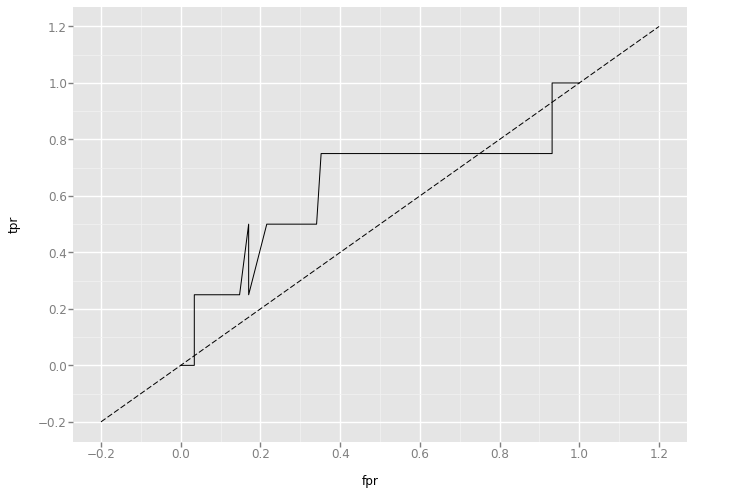

<ggplot: (57767261595)>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import xlsxwriter
from sklearn import metrics
from ggplot import *
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

# Parameters
server = 'localhost'
db = 'D4R_VOICE'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

# query db
sql_less_data_sms = """
SELECT        TOP (100) PERCENT dbo.Events.event, dbo.[Dataset 1_SMS_RAW].date AS tarih, COUNT(dbo.[Dataset 1_SMS_RAW].NUMBER_OF_REFUGEE_SMS) AS adet
FROM            dbo.Base_Station_Location INNER JOIN
                         dbo.[Dataset 1_SMS_RAW] ON dbo.Base_Station_Location.BTS_ID = dbo.[Dataset 1_SMS_RAW].OUTGOING_SITE_ID FULL OUTER JOIN
                         dbo.Events ON dbo.[Dataset 1_SMS_RAW].date = dbo.Events.date AND dbo.Base_Station_Location.MX_SAHAIL = dbo.Events.city AND dbo.Base_Station_Location.MX_SILCE = dbo.Events.district
GROUP BY dbo.Base_Station_Location.MX_SAHAIL, dbo.Base_Station_Location.MX_SILCE, dbo.Events.event, dbo.[Dataset 1_SMS_RAW].date
HAVING        (dbo.Base_Station_Location.MX_SAHAIL = 'IZMIR') AND (dbo.Base_Station_Location.MX_SILCE = 'DIKILI')
"""

df_sms_less = pd.read_sql(sql_less_data_sms, conn)


################################
xtrainyetmis_sms_less=df_sms_less['adet'].head(int(len(df_sms_less)*0.7)) 
xtestotuz_sms_less=df_sms_less['adet'].tail(int(len(df_sms_less)*0.3))
ytrainyetmis_sms_less=df_sms_less['event'].fillna(value=0).head(int(len(df_sms_less)*0.7)) 
ytestotuz_sms_less=df_sms_less['event'].fillna(value=0).tail(int(len(df_sms_less)*0.3))

################################

X, y = make_classification(n_samples=(int(len(df_sms_less)*0.7))  + (int(len(df_sms_less)*0.3)) , n_features=10, n_classes=2, n_informative=5)
Xtrain_sms_less = xtrainyetmis_sms_less.reshape(-1, 1)
Xtest_sms_less = xtestotuz_sms_less.reshape(-1, 1)
ytrain_sms_less = ytrainyetmis_sms_less
ytest_sms_less = ytestotuz_sms_less

clf = LinearRegression(normalize=True) #burası da böyle kalsın, normalizasyon iyidir ;)
clf.fit(Xtrain_sms_less, ytrain_sms_less)

###############################

preds = clf.predict(Xtest_sms_less)
fpr, tpr, _ = metrics.roc_curve(ytest_sms_less, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')